In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


initial_data = data
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-03,17.209999,17.440001,17.209999,17.420000,16.629358,8446400
2023-04-04,17.430000,17.459999,17.340000,17.370001,16.581629,7522300
2023-04-05,17.389999,17.440001,17.240000,17.330000,16.543444,5559700
2023-04-06,17.299999,17.370001,17.150000,17.250000,16.467073,6830800
2023-04-10,17.360001,17.400000,17.200001,17.389999,16.600718,9204200
...,...,...,...,...,...,...
2024-03-22,18.110001,18.120001,17.690001,17.719999,17.368120,15028500
2024-03-25,17.790001,17.790001,17.590000,17.629999,17.279907,12454500
2024-03-26,17.709999,17.820000,17.639999,17.750000,17.397524,10500900


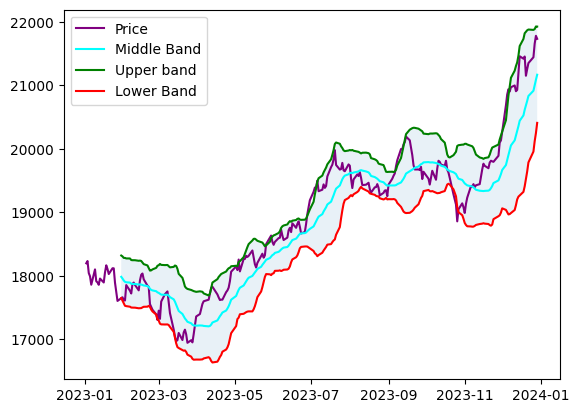

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ticker = "INFY"
data = yf.download(ticker, start="2023-04-01", end="2024-03-31")

def bollingerBand(data,period,multiplier):
    
    data["Middle"] = data["Close"].rolling(20).mean()
    std = data["Close"].rolling(period).std()
    data["Upper"] = data["Middle"] + multiplier * std
    data["Lower"] = data["Middle"] - multiplier * std

    plt.plot(data["Close"], label = "Price", color="purple")
    plt.plot(data["Middle"], label = "Middle Band", color="cyan")
    plt.plot(data["Upper"], label = "Upper band", color="green")
    plt.plot(data["Lower"], label = "Lower Band", color="red")
    plt.legend()
    plt.fill_between(data.index,data["Upper"],data["Lower"],alpha=.1)
    plt.show()
    
bollingerBand(data,20,2)

In [10]:
def TR_ATR(df, period):
    df["TR"] = float('NaN')
    df["TR"].iloc[0] = df["High"].iloc[0] - df["Low"].iloc[0]
    for i in range(1,len(df)):
        df["TR"].iloc[i] = np.maximum(df["High"].iloc[i] - df["Low"].iloc[i], np.maximum( abs(df["High"].iloc[i] - df["Close"].iloc[i-1])  ,  abs(df["Low"].iloc[i] - df["Close"].iloc[i-1])   ))
    df["ATR"] = df["TR"].rolling(period).mean()

In [15]:
def ema(df,period):
    df["EMA"] = df["Close"].rolling(period).mean()
    smoothing = 2
    multiplier = smoothing/(period+1)
    curr = df["EMA"].iloc[period-1]
    for i in range(period,len(df)):
        df["EMA"].iloc[i] = df.Close.iloc[i] * multiplier + curr * (1-multiplier)
        curr = df["EMA"].iloc[i]

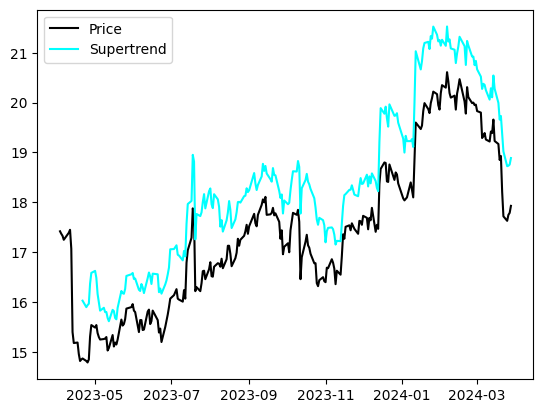

In [12]:
def supertrend(df, period, multiplier):
    TR_ATR(df,period)
    df["Supertrend"] = (df["High"] + df["Low"])/2 + multiplier * df["ATR"]
    
    plt.plot(df["Close"], label="Price", color="black")
    plt.plot(df["Supertrend"], label="Supertrend", color="cyan")
    plt.legend()
    plt.show()

ticker = "INFY"
data = yf.download(ticker, start="2023-04-01", end="2024-03-31")
supertrend(data,14,3)

[*********************100%%**********************]  1 of 1 completed


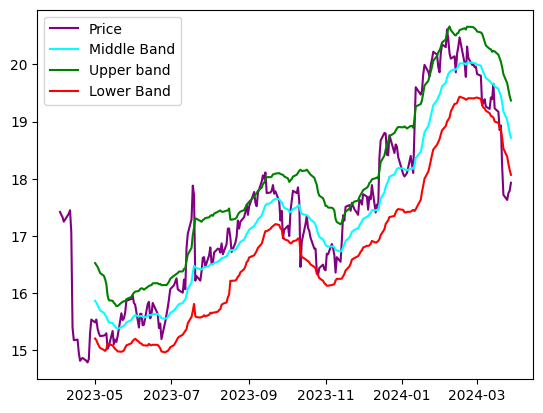

In [16]:
def keltnerChannel(df,period,multiplier):
    ema(df,period)
    TR_ATR(df,period)
    df["Middle"] = df["EMA"]
    df["Upper"] = df["EMA"] + multiplier*df["ATR"]
    df["Lower"] = df["EMA"] - multiplier*df["ATR"]
    
    plt.plot(df["Close"], label = "Price", color="purple")
    plt.plot(df["Middle"], label = "Middle Band", color="cyan")
    plt.plot(df["Upper"], label = "Upper band", color="green")
    plt.plot(df["Lower"], label = "Lower Band", color="red")
    plt.legend()

ticker = "INFY"
data = yf.download(ticker, start="2023-04-01", end="2024-03-31")
keltnerChannel(data,20,2)
    

In [22]:
print(data["Close"][0])

17.420000076293945


C:\Users\rverm\AppData\Local\Temp\ipykernel_24464\2077898816.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(data["Close"][0])


C:\Users\rverm\AppData\Local\Temp\ipykernel_24464\1465985525.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["EMA"].iloc[i] = df.Close.iloc[i] * multiplier + curr * (1-multiplier)
C:\Users\rverm\AppData\Local\Temp\ipykernel_24464\1465985525.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["EMA"].iloc[i] = df.Close.iloc[i] * multiplier + curr * (1-multiplier)
C:\Users\rverm\AppData\Local\Temp\ipykernel_24464\1465985525.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

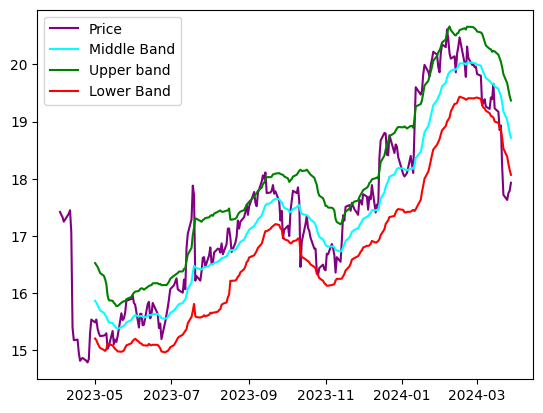

In [24]:
def macd(df):
    df["EMA_12"] = df["Close"].rolling(12).mean()
    smoothing = 2
    multiplier = smoothing/(12+1)
    curr = df["EMA"].iloc[11]
    for i in range(12,len(df)):
        df["EMA"].iloc[i] = df.Close.iloc[i] * multiplier + curr * (1-multiplier)
        curr = df["EMA"].iloc[i]

    df["EMA_26"] = df["Close"].rolling(26).mean()
    smoothing = 2
    multiplier = smoothing/(26+1)
    curr = df["EMA"].iloc[25]
    for i in range(26,len(df)):
        df["EMA"].iloc[i] = df.Close.iloc[i] * multiplier + curr * (1-multiplier)
        curr = df["EMA"].iloc[i]
    
    df["MACD"] = df["EMA_12"] - df["EMA_26"]
    plt.plot(df["MACD"],label="MACD",color="red")
    plt.plot(df["Close"],label="Price",color="cyan")
    plt.legend()
    plt.show()

C:\Users\rverm\AppData\Local\Temp\ipykernel_24464\2899047076.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["EMA"].iloc[i] = df.Close.iloc[i] * multiplier + curr * (1-multiplier)
C:\Users\rverm\AppData\Local\Temp\ipykernel_24464\2899047076.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["EMA"].iloc[i] = df.Close.iloc[i] * multiplier + curr * (1-multiplier)
C:\Users\rverm\AppData\Local\Temp\ipykernel_24464\2899047076.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

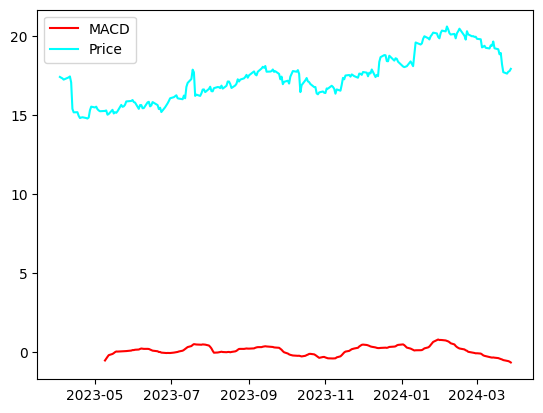

In [25]:
data = initial_data
macd(data)

[*********************100%%**********************]  1 of 1 completed

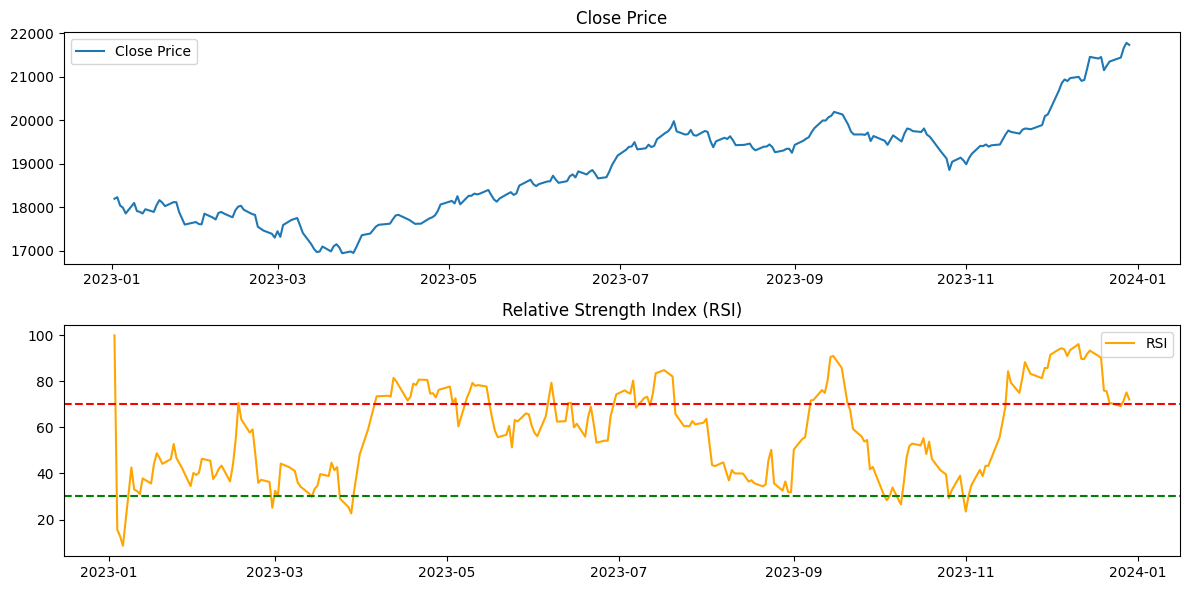

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi


ticker = "^NSEI"
data = yf.download(ticker, start="2023-01-01", end="2024-01-01")
data['RSI'] = calculate_rsi(data)

# Plot the data
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data['Close'], label='Close Price')
plt.title('Close Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data['RSI'], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.legend()

plt.tight_layout()
plt.show()